mathplotlib

pandas

seaborn

ggplot

bokeh

plot.ly

# *VERİ SETİ & İLK ADIMLAR

## veri setinin yapısının ve hikayesinin incelenmesi -- adım 1

In [2]:
import seaborn as sns
planets = sns.load_dataset("planets")
#dataset ilk 5 veri görüntüleme
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
dataFrame = planets.copy()

In [ ]:
dataFrame.head()

In [ ]:
#dataset yapısal bilgi
dataFrame.info()

In [ ]:
#veri tiplerini görüntüleme
dataFrame.dtypes

In [ ]:
#yukarıda object olan method un tipini değiştireceğiz
#(bazı metodlar onun category olduğunu bilip ona göre işlem yaparken bazıları string alırmış)
import pandas as pd
dataFrame.method = pd.Categorical(dataFrame.method)


## verinin betimlenmesi

In [ ]:
# değişken ve gözlem sayısı
# (gözlem,değişken)

dataFrame.shape

#sadece kolon isimleri

dataFrame.columns

#betimsel istatistikler

dataFrame.describe()

# veya transpozu,  eksik gözlemleri göz ardı eder, kategorik değişkenleri dışarıda bırakır (yani bütün değişkenler sayısal)
dataFrame.describe().T


In [ ]:
dataFrame.describe(include = "all").T


## eksik değerlerin incelenmesi

In [ ]:
#datasette eksik gözlem var mı?
dataFrame.isnull().values.any()
#isnull sorgulama yaptı, values üzerinde, any yani herhangi birinde varsa bir tane bile olsa true döner

In [ ]:
#hangi değişkende kaç tane eksik var
dataFrame.isnull().sum()

In [ ]:
#eksiklerin hepsini 0 ile doldurma, sadece orbital_period değişkeninde
dataFrame["orbital_period"].fillna(0, inplace = True)
#inplace = True olduğu için dataFrame'in yapısı bozulur, işlemler kaydolur

In [ ]:
#eksik değerleri değişkenin ortalamasıyla doldurma
dataFrame["orbital_period"].fillna(dataFrame.mass.mean(), inplace = True)

In [ ]:
#bütün dataset için
#eksik değerler ortalama ile dolduruldu
dataFrame.fillna(dataFrame.mean(), inplace = True)

In [ ]:
dataFrame.isnull().sum()

## kategorik değişken özetleri

In [ ]:
#sadece kategorik değişkenleri çekmek
kat_df = dataFrame.select_dtypes(include = ["object"])
#select_dtypes() dataframe içerisinden istediğimiz tipe göre değişken seçmek için kullanılır
kat_df.head()

In [ ]:
#bütün değişkenlerin sınıf bilgilaeri
kat_df.method.unique()

In [ ]:
#kaç tane sınıf var
kat_df["method"].value_counts().count()

In [ ]:
#kategorik değişkenin sınıflarının frekanslarına erişmek
kat_df["method"].value_counts()

In [ ]:
dataFrame["method"].value_counts().plot.barh();

#method kategorik değişkeninin içindeki kategorik sınıfları say, grafik yap

## sürekli değişken özetleri

In [ ]:
df_num = dataFrame.select_dtypes(include=["float64", "int64"])

In [ ]:
df_num.describe().T

In [ ]:
df_num["distance"].describe()

In [ ]:
print("ortalama: " + str(df_num["distance"].mean()))
print("dolu gözlem sayısı: " + str(df_num["distance"].count()))
print("maksimum deger: " + str(df_num["distance"].max()))
print("minimum deger: " + str(df_num["distance"].min()))
print("medyan: " + str(df_num["distance"].median()))
print("standart sapma: " + str(df_num["distance"].std()))

:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..

# *SÜTUN GRAFİK (BAR PLOT)

sütun grafikler elimizdeki kategorik değişkenleri görselleştirmek için kullanılır

In [ ]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.head()

In [ ]:
#cut --> kalite verisi
df['cut'].value_counts()

In [ ]:
df['color'].value_counts()
#bu veri seti içerisindeki kategorik değişkenler nominal değil ordinal olduğunu görüyoruz
#kötüden iyiye bir sıralama olması ordinal olması demek

In [ ]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

df.cut.head() #df içerisindeki cut değişkenine ulaşıyoruz

In [ ]:
df.cut.astype(CategoricalDtype(ordered = True))
#astype tipi verilen tipe göre değiştiriyor

In [ ]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [ ]:
df.dtypes

In [ ]:
df.cut.head(1)

In [ ]:
#sıralama veri setinin hikayesine uymadığı için kendimiz tekrardan ifade ediyoruz
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories= cut_kategoriler, ordered=True ))
df.cut.head(1)

In [ ]:
#barplot
#pandas ile görselleştirm
df["cut"].value_counts().plot.barh()

In [ ]:
df["cut"].value_counts().plot.barh(); #bu noktalı virgülü koyunca axes bilgi yazısı kalkıyor

In [ ]:
df["cut"].value_counts().plot.barh().set_title("cut değişkeninin sınıf frekansları");
#bu satırı parantez içine alıp noktalardan kesebiliriz, okunabilirlik kolaylaşır başka fark yok

In [ ]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("cut değişkeninin sınıf frekansları"));

In [ ]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

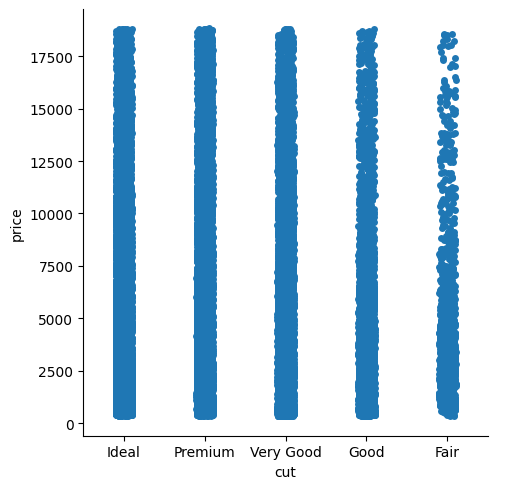

In [ ]:
#çaprazlamalar (kırılımlar)
#veri setinde yer alan değişkenlerin bir arada değerlendirilmesi
#değişkenlerin etkilerinin bir arada değerlendirilmesi

#kategorik değişkenleri görselleştirme catplot
sns.catplot(x = "cut", y = "price", data = df);

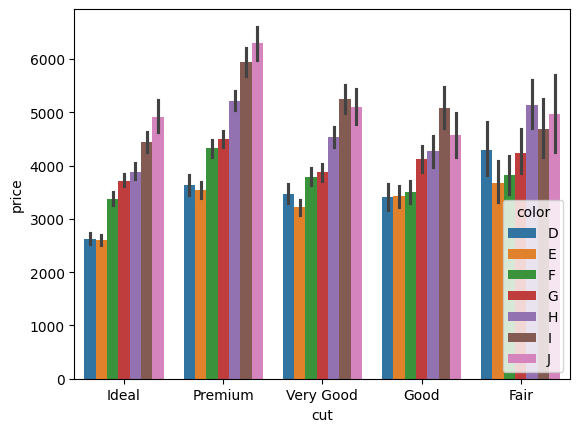

In [ ]:
#grafiğe bir boyut daha ekliyoruz
sns.barplot(x = "cut", y = "price", hue = "color", data = df);
#barplot ve catplot birbiri yerine kullanılabiliyor

In [ ]:
#yukarıdaki grafikte görüntülenen değerleri doğrulamaya çalışıcaz

df.groupby(["cut", "color"])["price"].mean()
#çift gruplama işlemi
#önce cut'a göre sonra color'a göre kır, price değişkenine göre ortalama işlemi yap

cut        color
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Fair       D        4291.061350
           E        3682.312500
           F        382

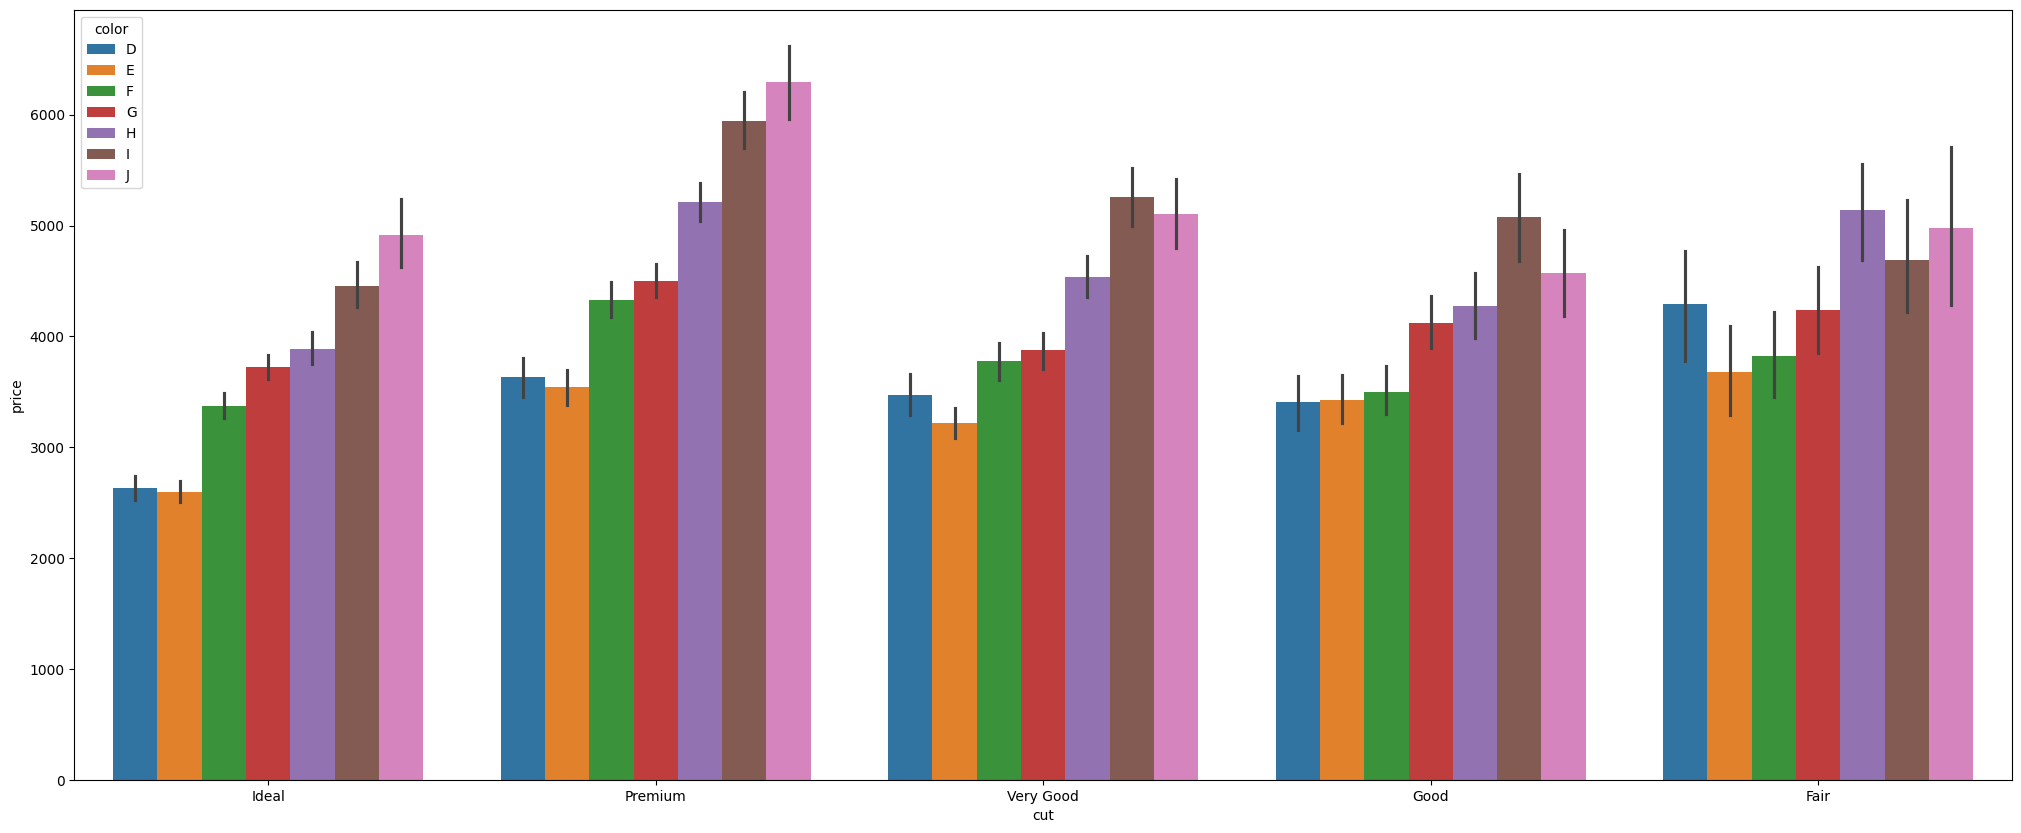

In [ ]:
from matplotlib.pyplot import figure
figure(figsize = (25, 10))
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..:..

# *HİSTOGRAM VE YOĞUNLUK GRAFİKLERİ

sayısal değişkenlerin dağılımını ile ilgili bilgi sahibi oluruz

In [4]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


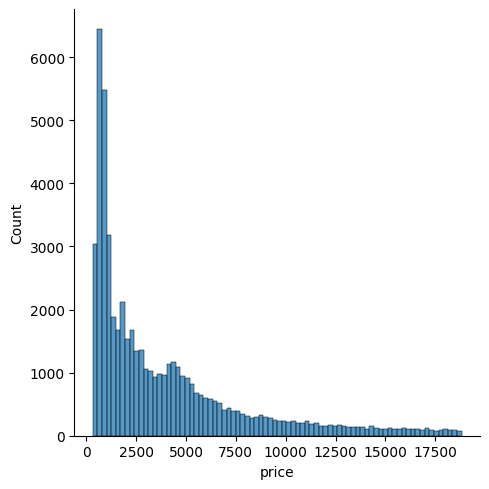

In [5]:
#sns.displot() dağılım görselleştirmeyi sağlayan bir fonksiyon
sns.displot(df.price, kde = False);

In [6]:
?sns.displot

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

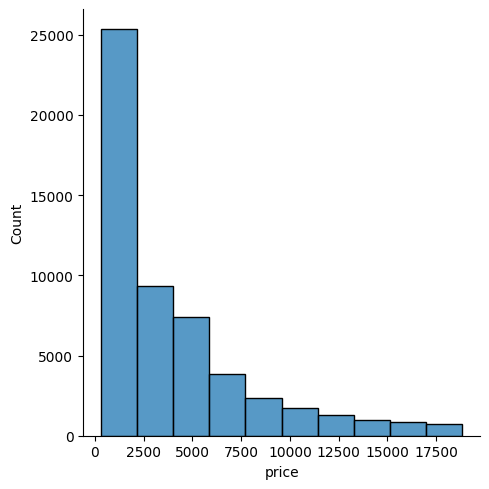

In [ ]:
sns.displot(df.price, bins = 10, kde = False);
#10 adet sütun olacak şekilde grafiği oluşturur

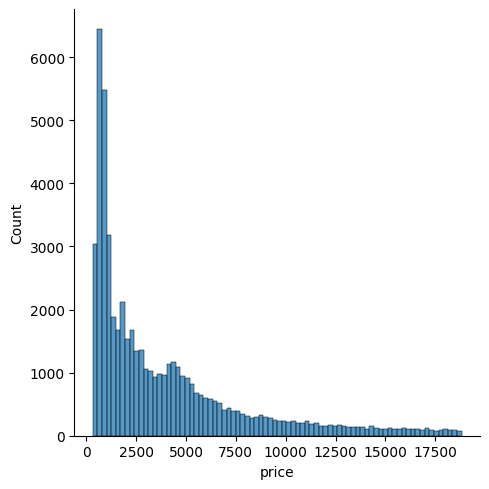

In [7]:
#sns.distplot(df.price);
#yeni displot fonksiyonunda burada çizilen yoğunluk grafiğini vermiyor
sns.displot(df.price);

In [10]:
#sns.distplot(df.price, hist = False);
#yeni displot fonksiyonunda hist parametresi yok

iki tepeli bir yapı ortaya çıkmış, veride çarpıklık var

In [9]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

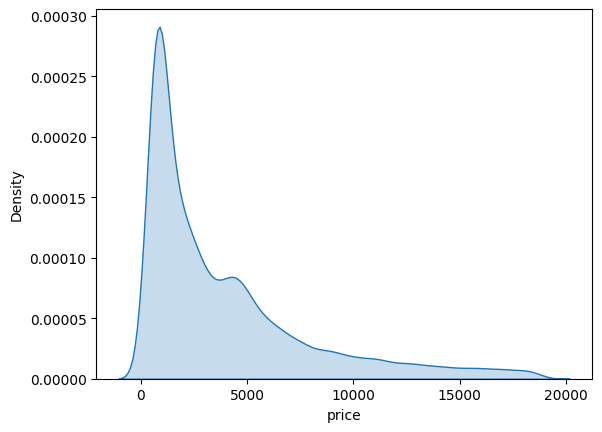

In [11]:
#sns.kdeplot(df.price, shade = True); #eski
sns.kdeplot(df.price, fill = True); #yeni

#### histogram ve yoğunluk çaprazlamalar

/home/yaren/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/yaren/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/yaren/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/yaren/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please u

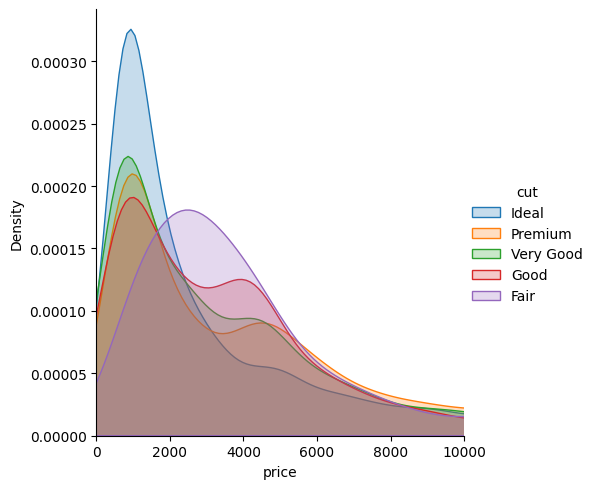

In [13]:
(sns
 .FacetGrid(df,
              hue="cut",
              height=5,
              xlim=(0,10000))
.map(sns.kdeplot, "price", shade=True)
.add_legend()
);

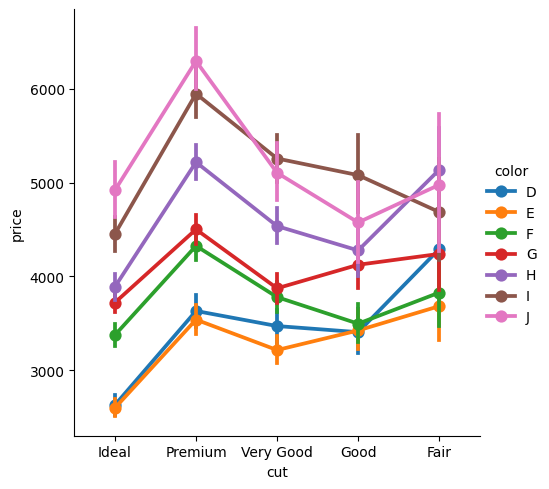

In [16]:
sns.catplot(x="cut", y="price", hue="color", kind="point", data = df);

# *KUTU GRAFİK

In [1]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [4]:
#kategorik değişkenlerin frekansını inceliyoruz
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [5]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [6]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [7]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

<Axes: xlabel='total_bill'>

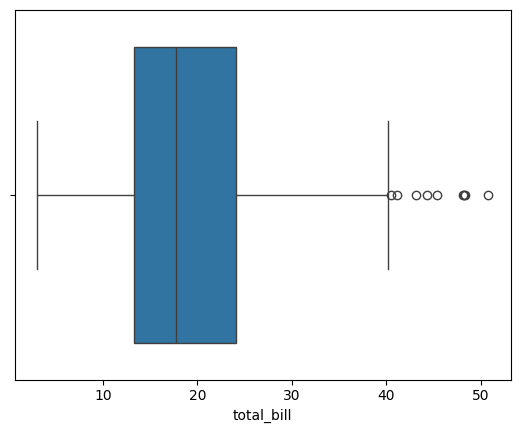

In [8]:
#kartiller aracılığıyla bilgi sunan görselleştirme tekniği
sns.boxplot(x=df["total_bill"])

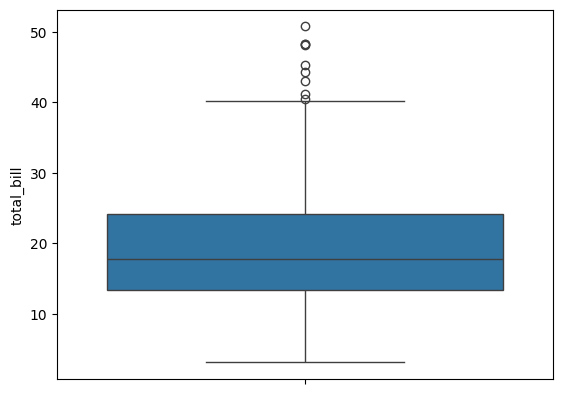

In [19]:
#sns.boxplot(x = df["total_bill"], orient="v"); --> bu çalışmadı, muhtemelen fonksiyon güncellenmiş
sns.boxplot(y = df["total_bill"]);

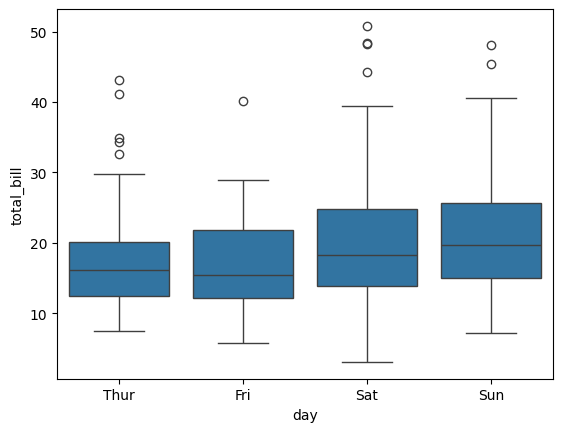

In [21]:
 #soru: hangi günler daha fazla kazanıyoruz?
sns.boxplot(x = "day", y = "total_bill", data = df);

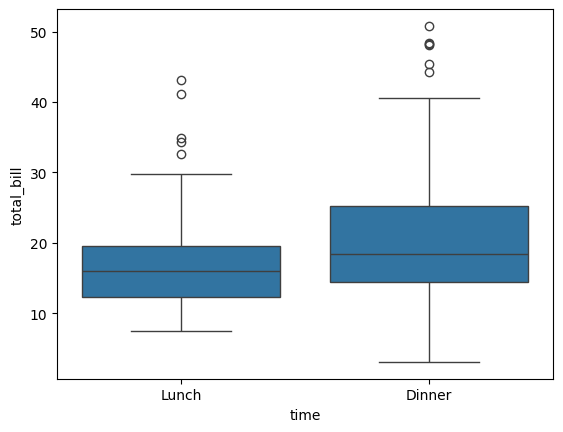

In [22]:
#soru: sabah mı akşam mı daha çok kazanıyoruz
sns.boxplot(x = "time", y = "total_bill", data = df);

bu bilgiler doğrultusunda en iyi personelin akşamları ve haftasonları çalışması kararı alınabilir

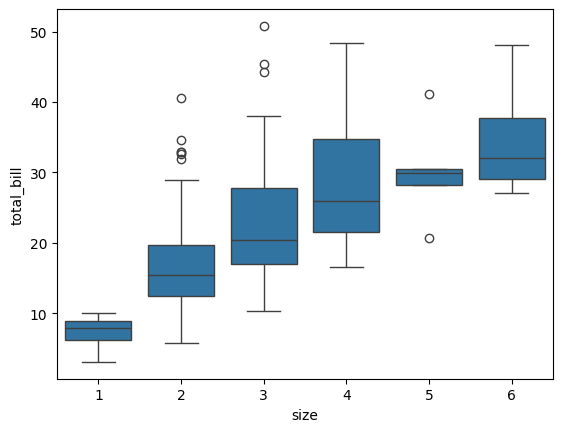

In [23]:
#soru: yemeğe gelen grup sayısı ile kazanç arasındaki ilişki doğru orantılı mı değil mi?
sns.boxplot(x = "size", y = "total_bill", data = df);

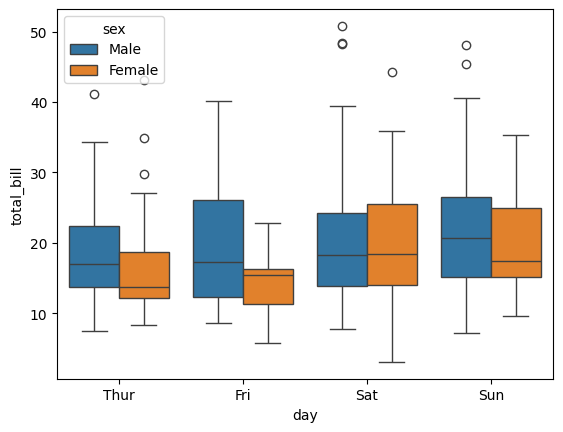

In [25]:
sns.boxplot(x = "day", y = "total_bill",hue = "sex", data = df);

cumartesi dışında kadındar daha az ödeme yapıyormuş

# *VIOLIN GRAFİK

yoğunluk grafiği ile kutu grafiğin kesişimi gibi
dağılım hakkında biraz daha bilgi sunar

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


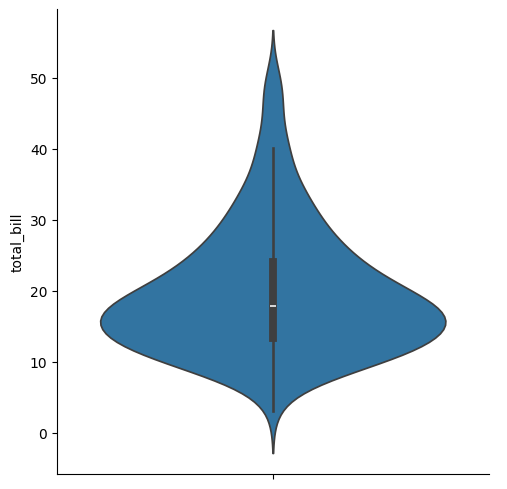

In [27]:
sns.catplot(y="total_bill", kind="violin", data = df);

merkezi eğilim, medyan gibi konularda bilgi edinebiliriz

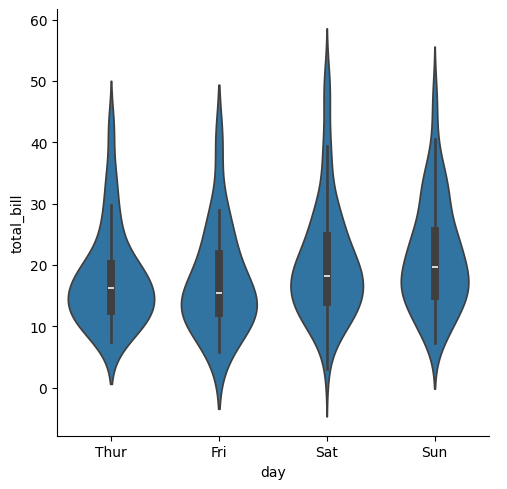

In [28]:
#violin çaprazlamalar
#boyut ekliyoruz
sns.catplot(x = "day", y = "total_bill", kind="violin", data = df);


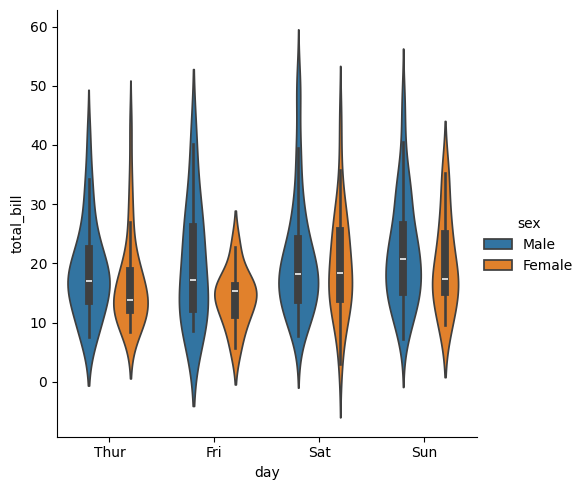

In [29]:
sns.catplot(x = "day", y = "total_bill",hue = "sex", kind="violin", data = df);

# *KORELASYON GRAFİKLERİ

korelasyon: değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terim

scatterplot: iki değişken arasındaki durumu inceler, saçılım grafiği, korelasyon analizinin görsel hali

In [30]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


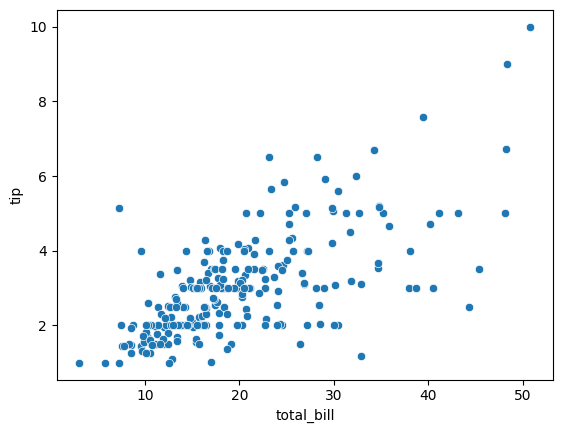

In [31]:
sns.scatterplot(x="total_bill", y="tip", data = df);
#totalbill sürekli değişken

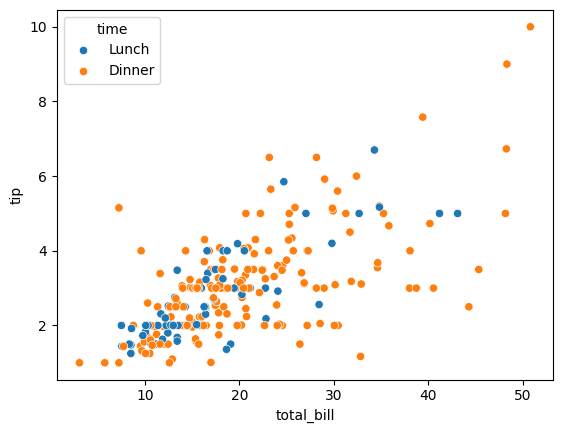

In [32]:
#çaprazlamalar
sns.scatterplot(x="total_bill", y="tip", hue = "time", data = df);

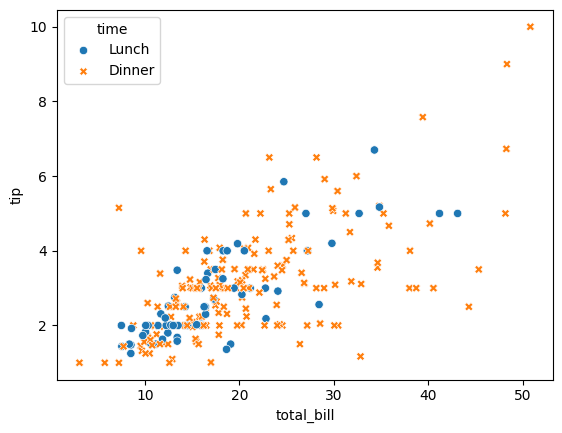

In [34]:
sns.scatterplot(x="total_bill", y="tip", hue = "time", style="time", data = df);

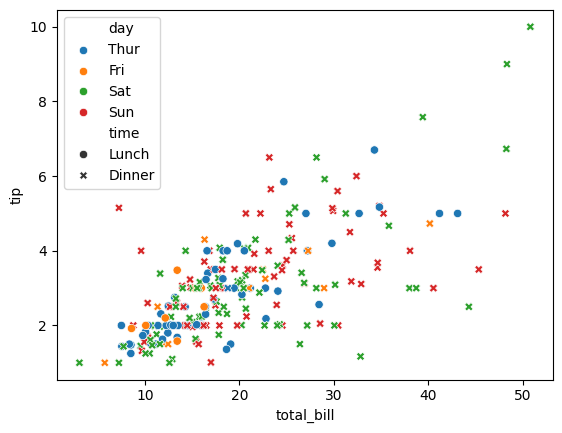

In [35]:
sns.scatterplot(x="total_bill", y="tip", hue = "day", style="time", data = df);

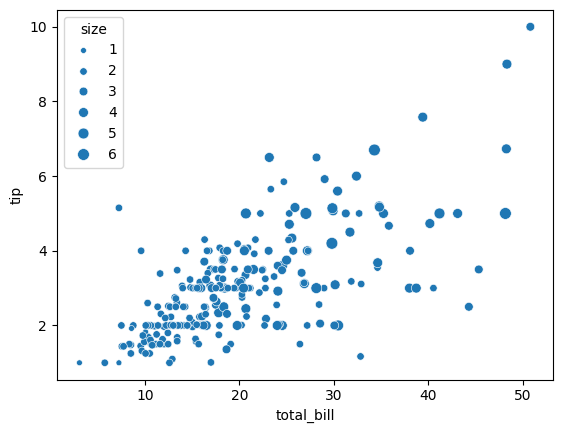

In [40]:
sns.scatterplot(x="total_bill", y="tip",size="size", data = df);

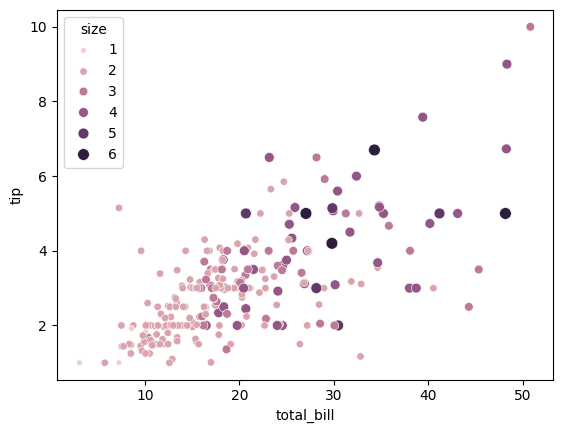

In [39]:
sns.scatterplot(x="total_bill", y="tip", hue="size",size="size", data = df);

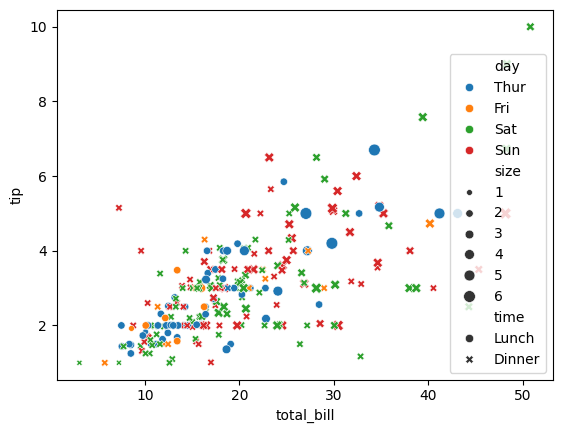

In [38]:
sns.scatterplot(x="total_bill", y="tip", hue = "day", style="time",size = "size", data = df);

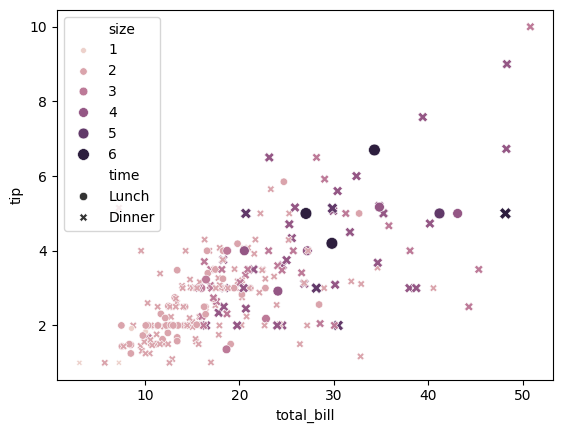

In [41]:
sns.scatterplot(x="total_bill", y="tip", hue = "size", style="time",size = "size", data = df);

### doğrusal ilişkinin gösterilmesi

In [44]:
import matplotlib.pyplot as plt

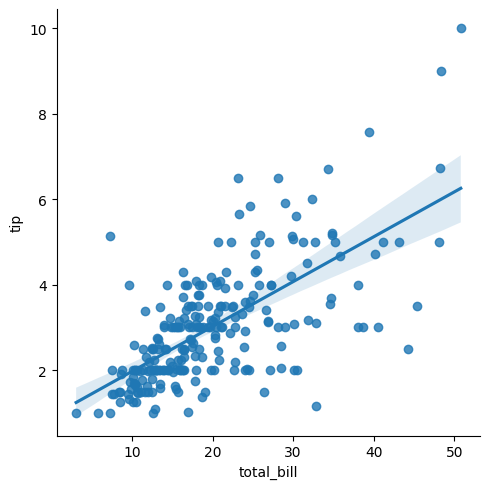

In [45]:
#lineer
sns.lmplot(x = "total_bill", y="tip", data = df);

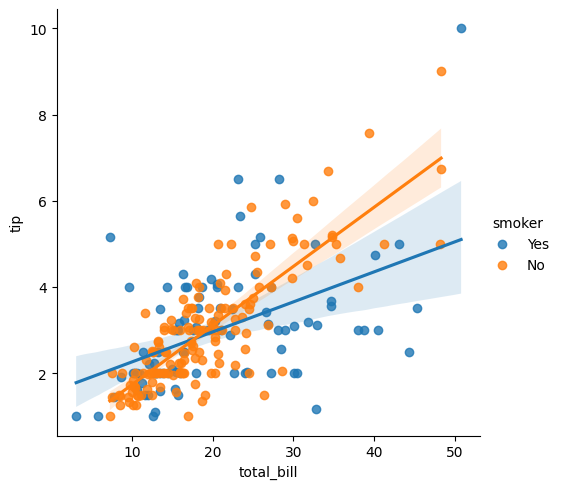

In [46]:
sns.lmplot(x = "total_bill", y="tip", hue= "smoker", data = df);

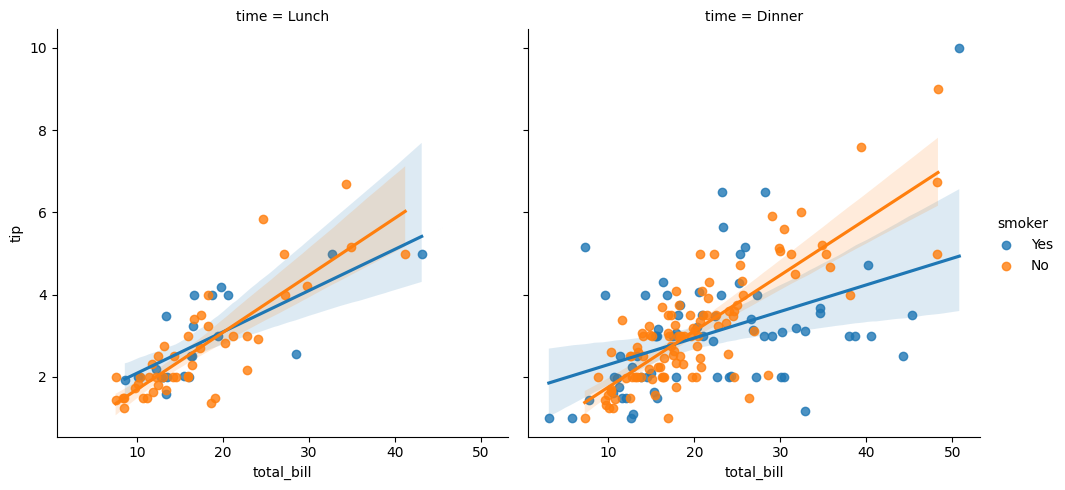

In [47]:
sns.lmplot(x = "total_bill", y="tip", hue= "smoker",col = "time", data = df);

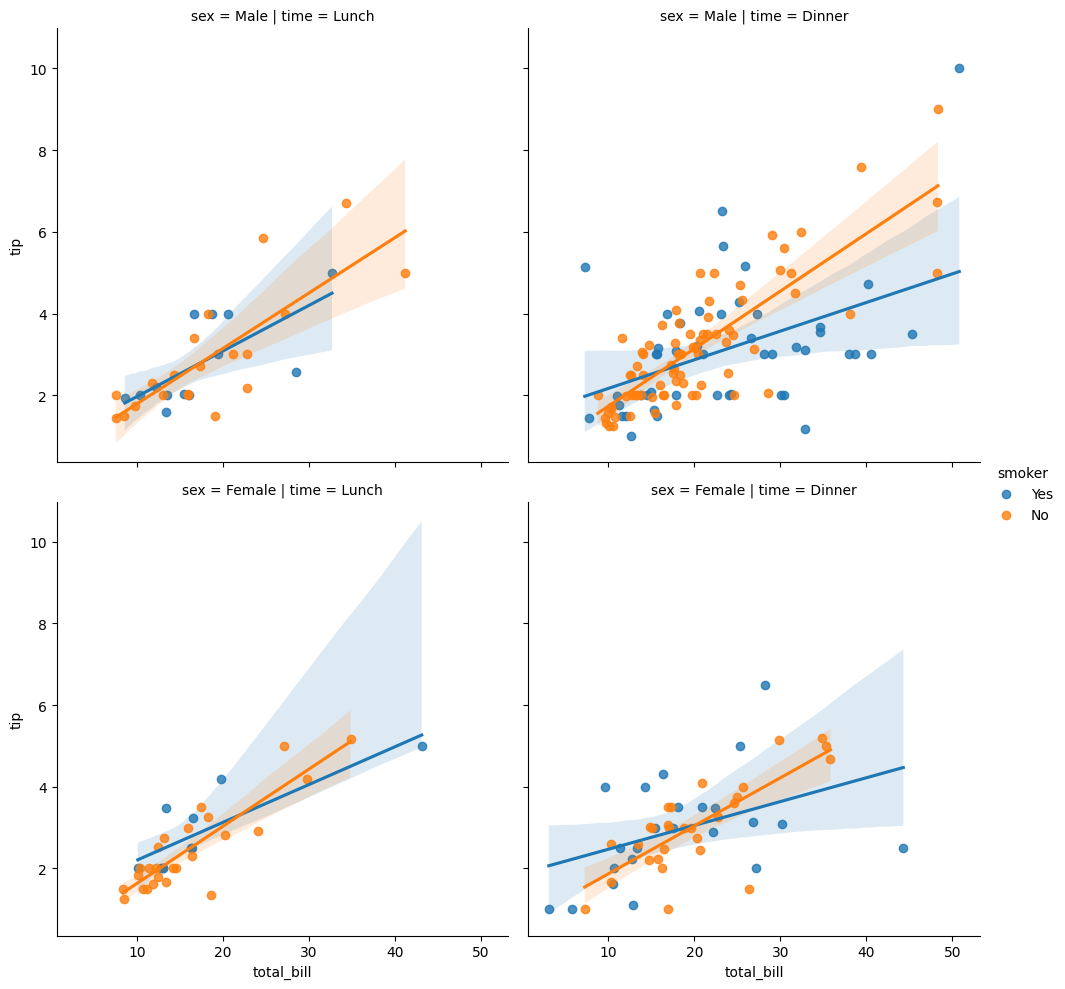

In [48]:
sns.lmplot(x = "total_bill", y="tip", hue= "smoker",col = "time",row="sex", data = df);

#### scatterplot matrisi

In [49]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [51]:
df.shape

(150, 5)

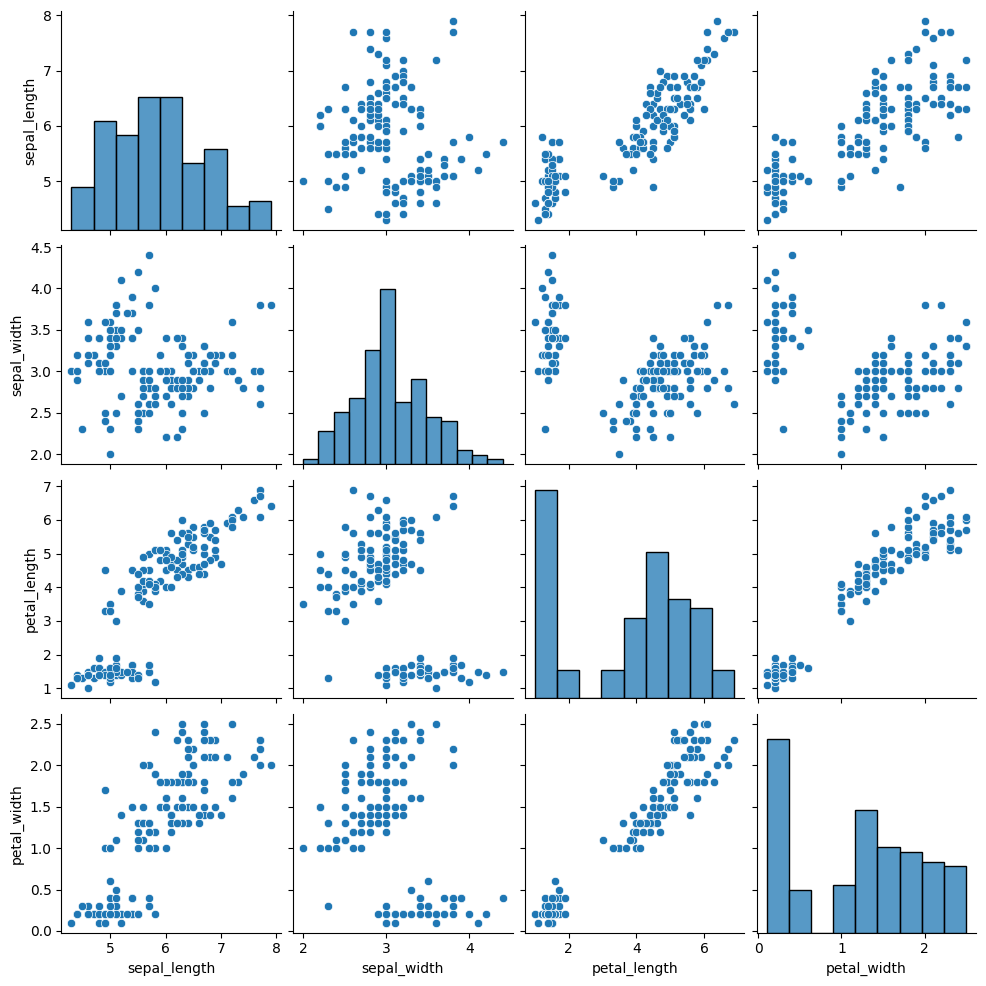

In [54]:
sns.pairplot(df);

scatterplot görsellerinde oluşturulmuş olan grafik toz bulutu şeklindeyse o iki değişken arasında ilgi yok

farklı köşelerde kümelenmeler varsa çaprazlamaları ifade eden alt gruplar vardır

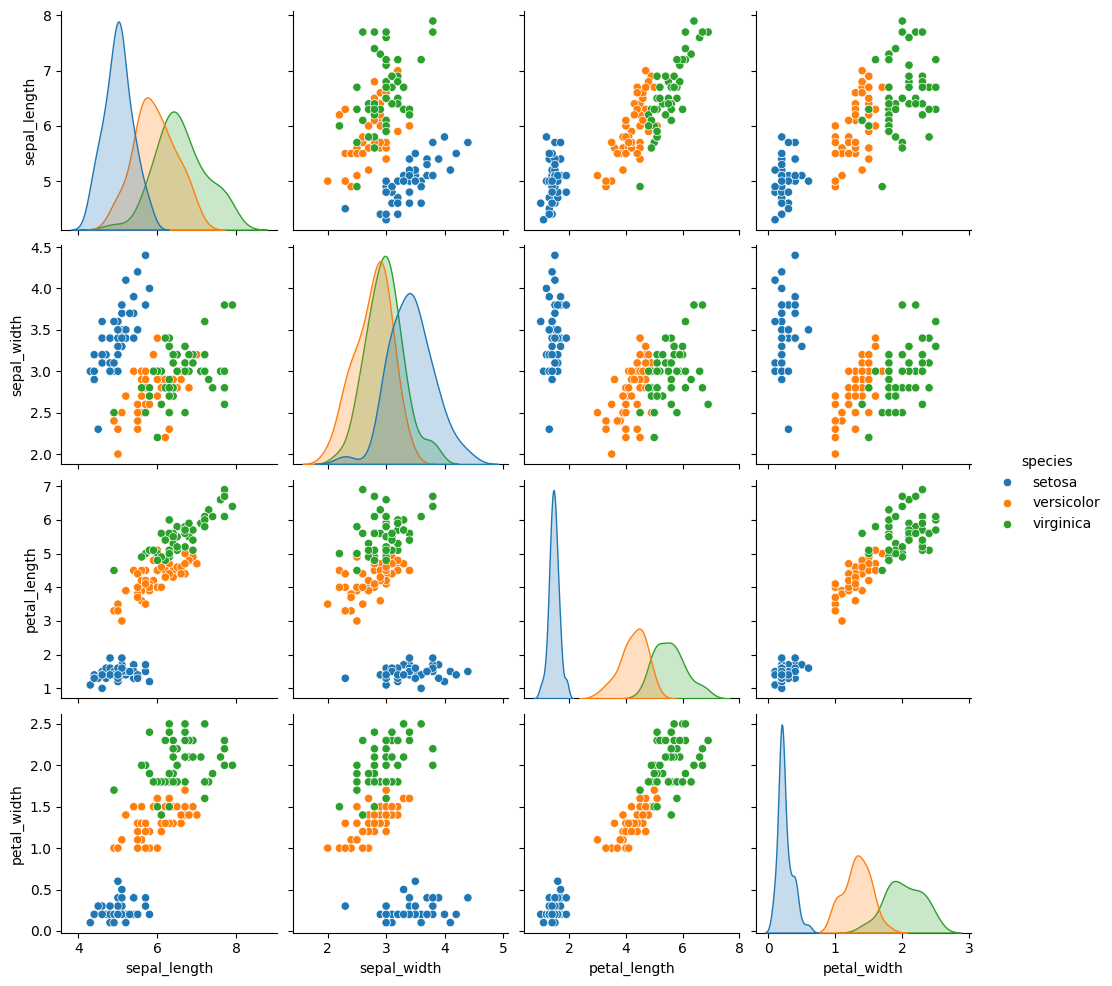

In [56]:
sns.pairplot(df, hue = "species");

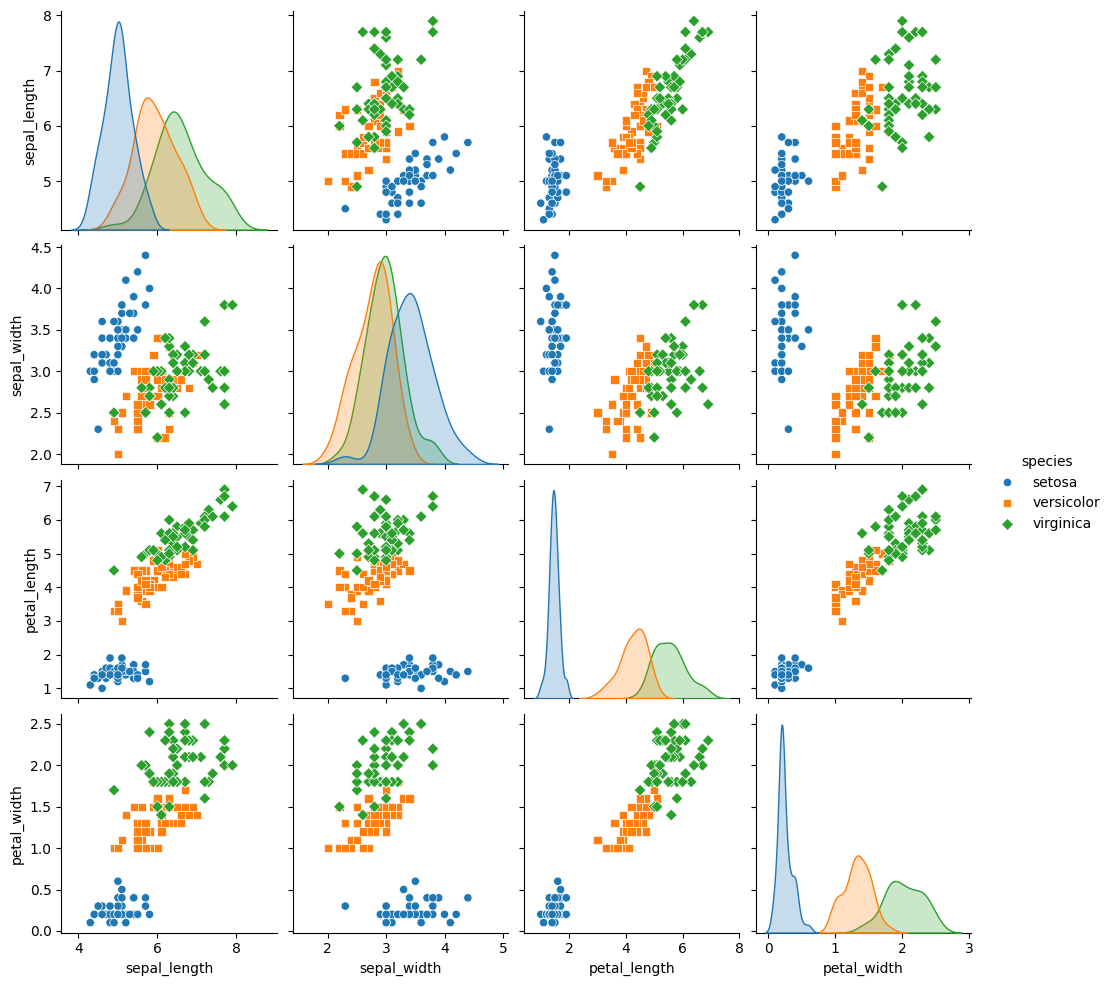

In [57]:
sns.pairplot(df, hue = "species", markers = ["o", "s","D"]);

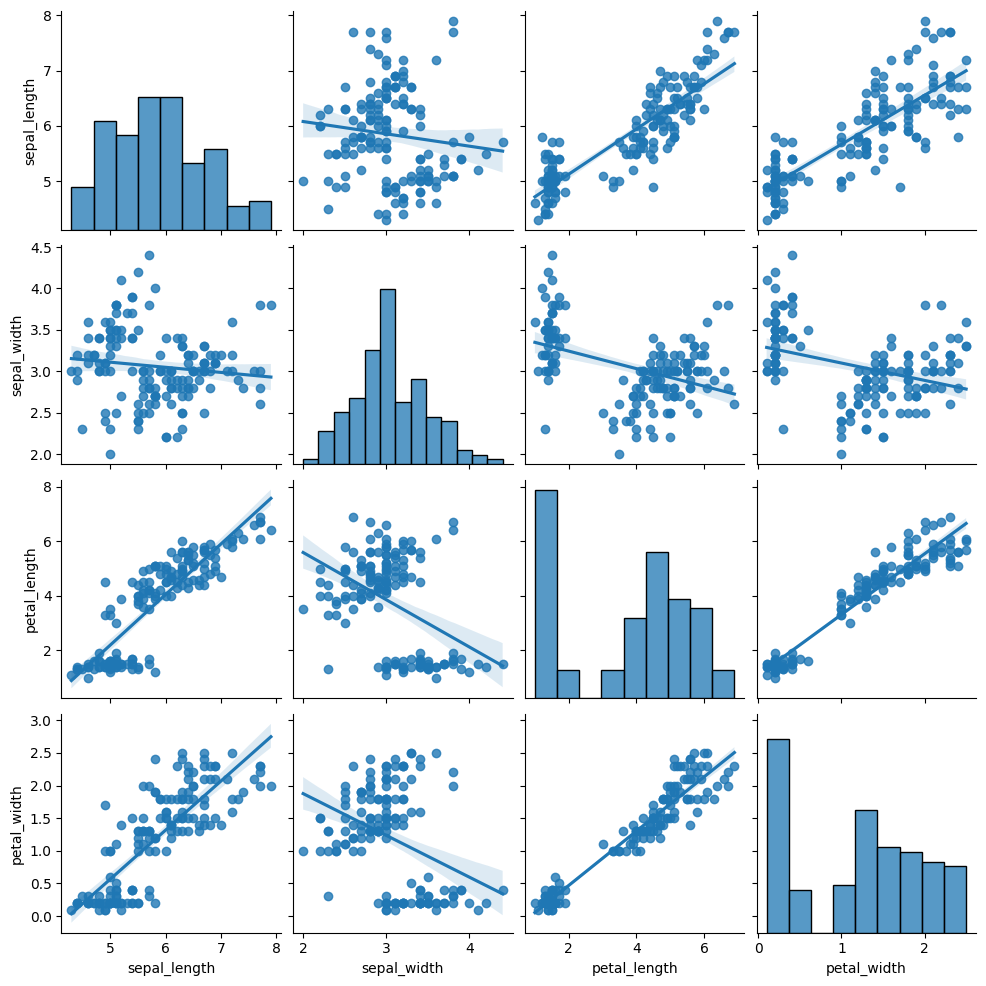

In [59]:
#grafiğe doğru ekleme
sns.pairplot(df, kind ="reg");

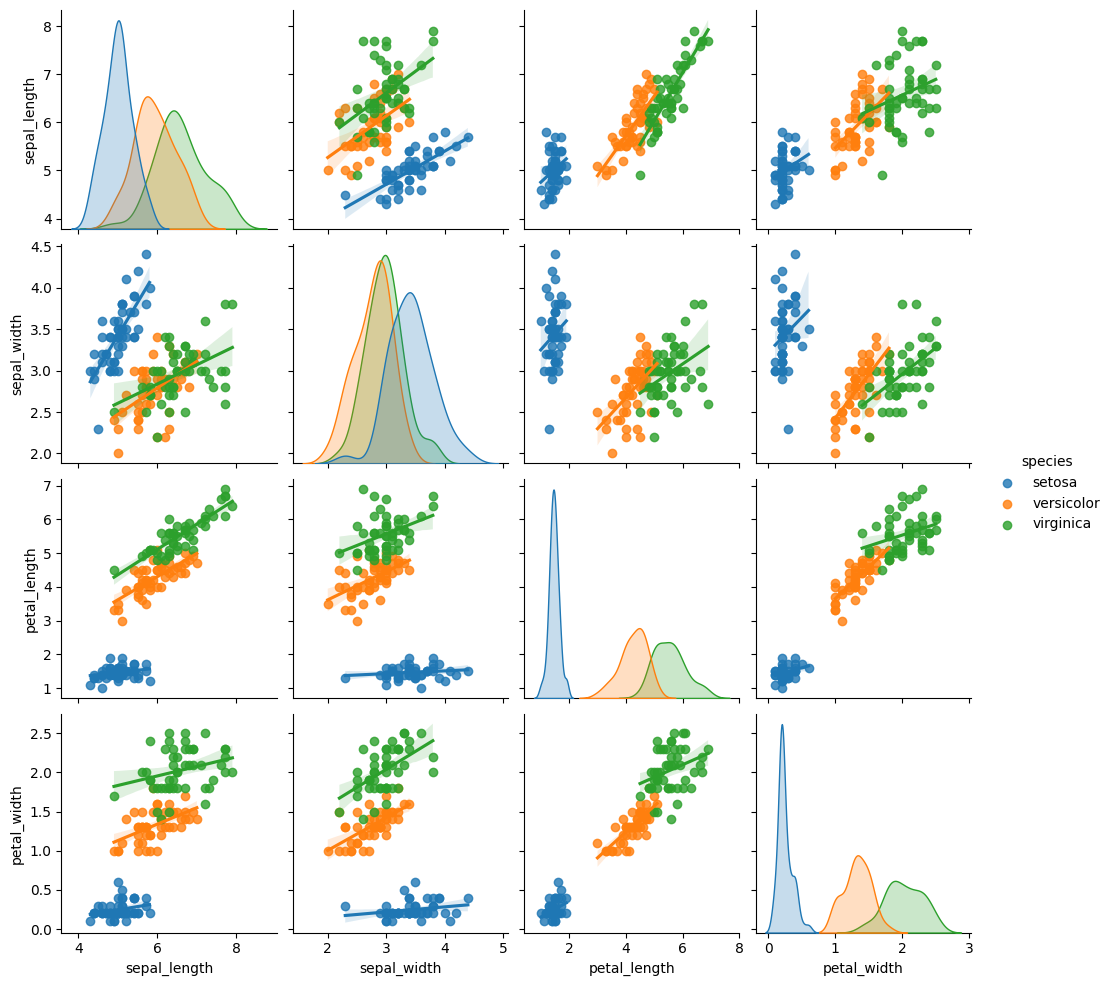

In [60]:
sns.pairplot(df, kind ="reg", hue = "species");

# *ISI HARİTASI

pattern detection problemlerinde kullanılır

In [61]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [62]:
df.shape

(144, 3)

In [65]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [69]:
?df.pivot

Signature: df.pivot(*, columns, index=<no_default>, values=<no_default>) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
columns : str or object or a list of str
    Column to use to make new frame's columns.
index : str or object or a list of str, optional
    Column to use to make new frame's index. If not given, uses existing index.
values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    specified, all remaining columns will be used and the result will
    have hierarchically indexed columns.

Returns
-------
DataFrame
    Re

In [74]:
df = df.pivot(columns = "month",index = "year", values="passengers");

In [76]:
df

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


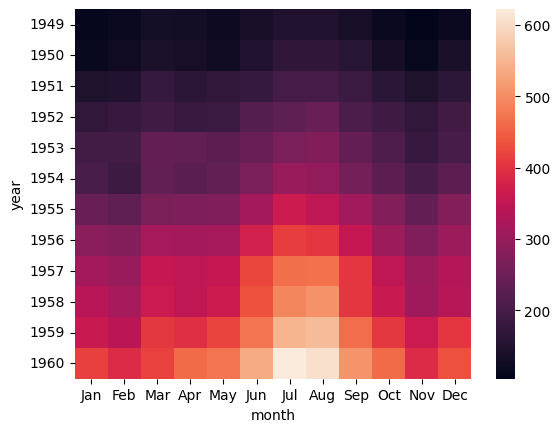

In [79]:
sns.heatmap(df);

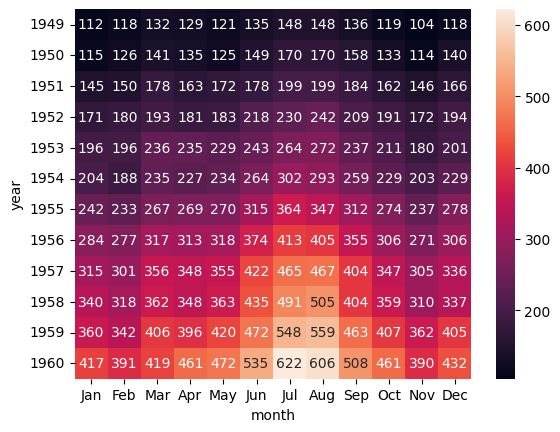

In [81]:
sns.heatmap(df, annot = True, fmt = "d");

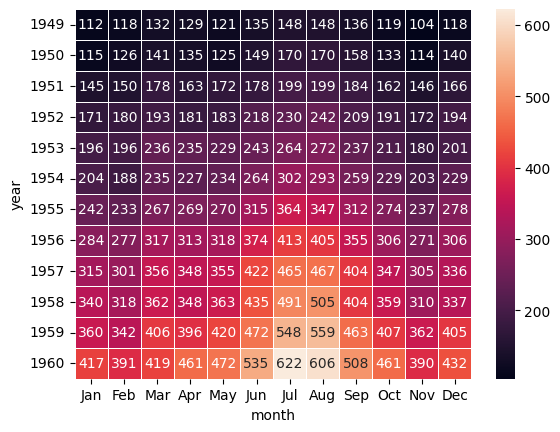

In [82]:
sns.heatmap(df, annot = True, fmt = "d", linewidths=.5);

# *ÇİZGİ GRAFİK

#### veri setini tanıma

In [84]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [85]:
df.shape

(1064, 5)

In [86]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

std harici ondalıklı sayı yok
bu, time noktalarının kesikli olduğu anlamına gelir

In [87]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [89]:
#zaman noktalarına göre sinyalleri grupla ve say
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [90]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [91]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


#### çizgi grafiğin oluşturulması

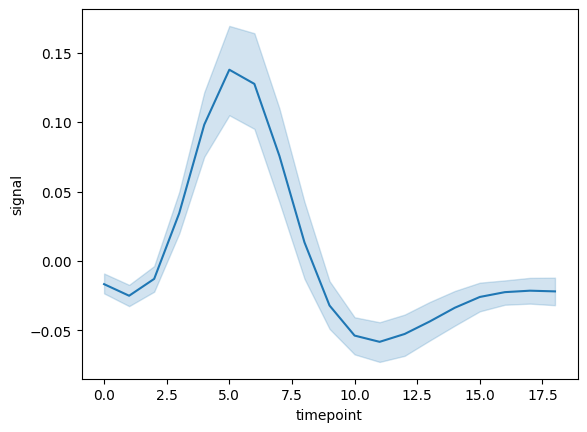

In [92]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

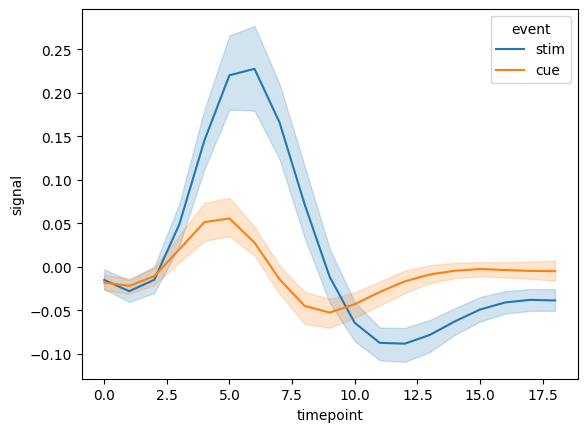

In [93]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

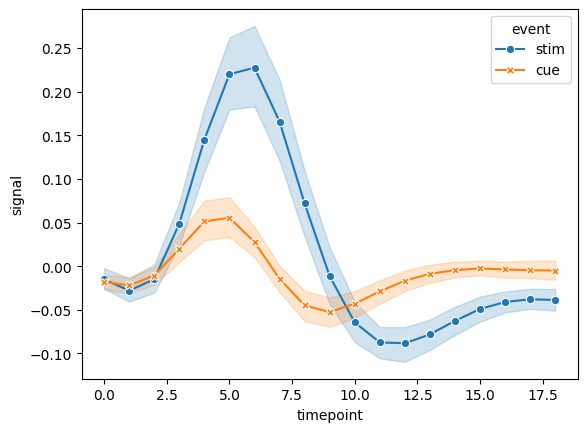

In [95]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event",style="event", data = df, markers = True, dashes = False);

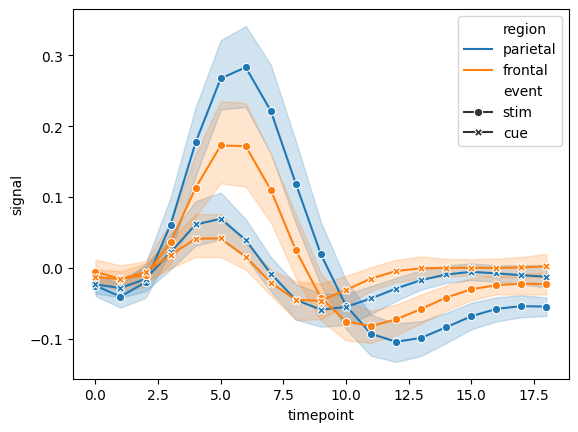

In [96]:
sns.lineplot(x = "timepoint", y = "signal", hue = "region",style="event", data = df, markers = True, dashes = False);

# *BASİT ZAMAN SERİSİ GRAFİĞİ

In [103]:
%pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [104]:
import pandas_datareader as pr

In [105]:
?pr.get_data_yahoo

Signature: pr.get_data_yahoo(*args, **kwargs)
Docstring: <no docstring>
File:      ~/.local/lib/python3.10/site-packages/pandas_datareader/data.py
Type:      function

In [111]:
#zaman serisi verisi
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2019-08-25")
df.head()

AttributeError: 'NoneType' object has no attribute 'group'

In [110]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [112]:
df.shape

(1064, 5)

In [ ]:
kapanis = df["Close"]
kapanis.head()

In [ ]:
kapanis.plot();

In [ ]:
kapanis.index

In [ ]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [ ]:
kapanis.head()

In [ ]:
kapanis.plot();

--*--*--

kategorik değişkenler --> barplot

sayısal değişkenler --> boxplot, histograö

dağılım --> violin grafik

değişkenleri birlikte değerlendirme --> korelasyon